In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd

# Set font and fontsize globally
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 11

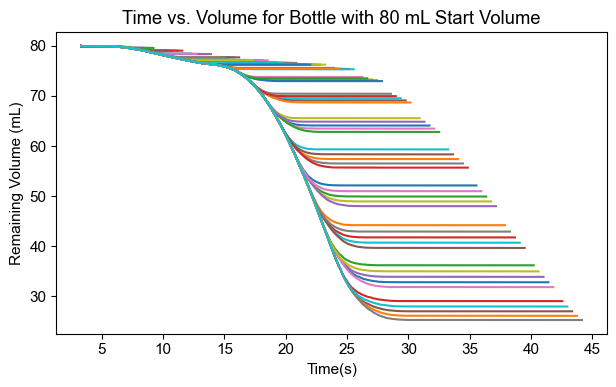

In [11]:
# iterate over folders in CellFlask

# Specify the path to the parent folder
parent_folder = 'MediumBottle'

plt.figure(figsize=(6.3, 4))
# Iterate over all entries in the parent folder
for entry in os.scandir(parent_folder):
    if entry.is_dir():
        folder_name = entry.name
        folder_path = entry.path + '/'

        # if folder name starts with 'Flask_45'
        if folder_name.startswith('Medium_80'):
            theta_vs_volume = np.loadtxt(folder_path + 'theta_vs_volume.txt', delimiter='\t', skiprows=1)
            plt.plot(theta_vs_volume[2000:-2000,2]-30, theta_vs_volume[2000:-2000,0]/400)

# axis labels
plt.ylabel('Remaining Volume (mL)')
plt.xlabel('Time(s)')
# cut off x-axis at 30 s
#plt.xlim(30, 120)
# set y-axis ticks
#plt.xticks(np.arange(0, 90, 20))
plt.title('Time vs. Volume for Bottle with 80 mL Start Volume')
plt.tight_layout()
plt.savefig('plots/4_2_A_time_vs_volume_bottle_50mL.png', dpi=600)
plt.show()


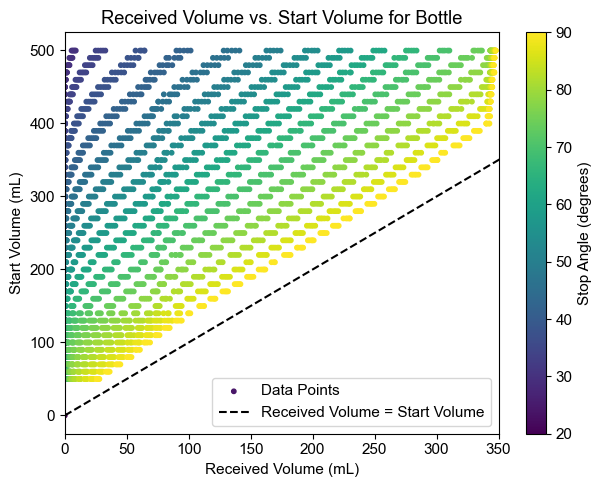

In [14]:
# load the data from summary_flask.csv and skip rows 0 and 1 using pandas library
summary_flask = pd.read_csv('summary_medium_final.csv', skiprows=[0,1])

plt.figure(figsize=(6.3, 4))
# make colors of point based on the 7th column with small marker size
plt.scatter(summary_flask.iloc[:,7], summary_flask.iloc[:,5], c=summary_flask.iloc[:,3], s=10)

# plot diagonal line
plt.plot([0, 480], [0, 480], color='black', linestyle='--')

# axis labels
plt.ylabel('Start Volume (mL)')
plt.xlabel('Received Volume (mL)')
plt.title('Received Volume vs. Start Volume for Bottle')
plt.xlim(0, 350)

# explain colorbar
plt.colorbar(label='Stop Angle (degrees)')
plt.legend(['Data Points','Received Volume = Start Volume'], loc='lower right')
plt.tight_layout()
plt.savefig('plots/4_2_B_received_vs_starting_volume_bottle.png', dpi=600)
plt.show()


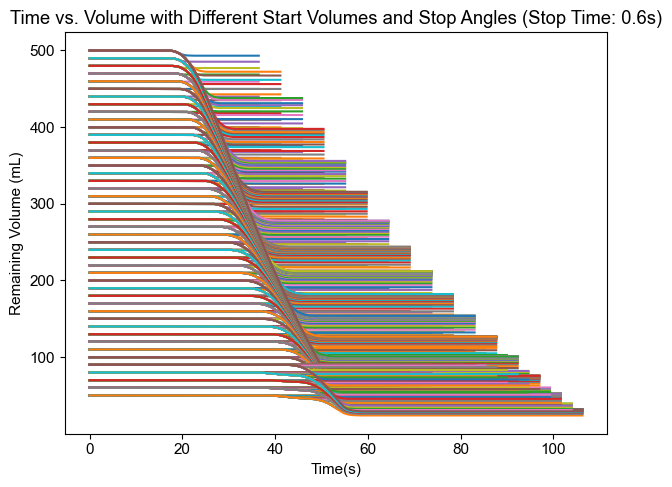

In [15]:
# Specify the path to the parent folder
parent_folder = 'MediumBottle'

plt.figure(figsize=(6.3, 5))
# Iterate over all entries in the parent folder
for entry in os.scandir(parent_folder):
    if entry.is_dir():
        folder_name = entry.name
        folder_path = entry.path + '/'

        # if folder name starts with 'Flask_45'
        if '600' in folder_name:
            theta_vs_volume = np.loadtxt(folder_path + 'theta_vs_volume.txt', delimiter='\t', skiprows=1)
            # make color of plot based on the max of the second column

            plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/400)
            #plt.legend([max(theta_vs_volume[:,1])])
            #plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/400)


        # plot the first column of theta_vs_volume against the second column
        #plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/300)

# axis labels
plt.ylabel('Remaining Volume (mL)')
plt.xlabel('Time(s)')
plt.title('Time vs. Volume with Different Start Volumes and Stop Angles (Stop Time: 0.6s)')
plt.tight_layout()
plt.savefig('plots/4_2_C_time_vs_volume_flask_20degrees_bottle.png', dpi=600)
plt.show()


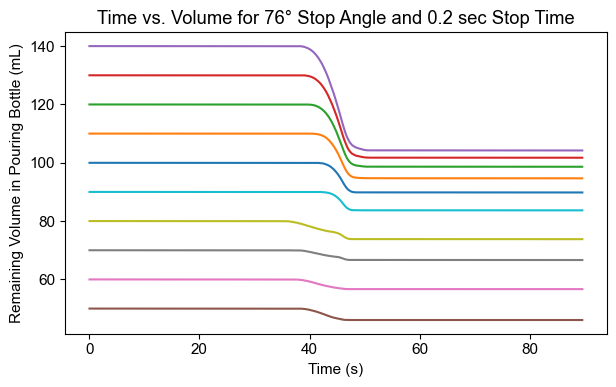

In [16]:
# Specify the path to the parent folder
parent_folder = 'MediumBottle'

plt.figure(figsize=(6.3, 4))
# Iterate over all entries in the parent folder
for entry in os.scandir(parent_folder):
    if entry.is_dir():
        folder_name = entry.name
        folder_path = entry.path + '/'

        # if folder name starts with 'Flask_45'
        if folder_name.endswith('200_76'):
            # if folder name contains '600'
        #if '600_20' in folder_name:
            theta_vs_volume = np.loadtxt(folder_path + 'theta_vs_volume.txt', delimiter='\t', skiprows=1)
            # make color of plot based on the max of the second column

            plt.plot(theta_vs_volume[:,2], theta_vs_volume[:,0]/400)

# axis labels
# cut plot at x = 22
#plt.xlim(0, 100)
plt.ylabel('Remaining Volume in Pouring Bottle (mL)')
plt.xlabel('Time (s)')
plt.title('Time vs. Volume for 76° Stop Angle and 0.2 sec Stop Time')
plt.tight_layout()
plt.savefig('plots/4_2_D_time_vs_volume_flask_20degrees_200ms_bottle.png', dpi=600)
plt.show()


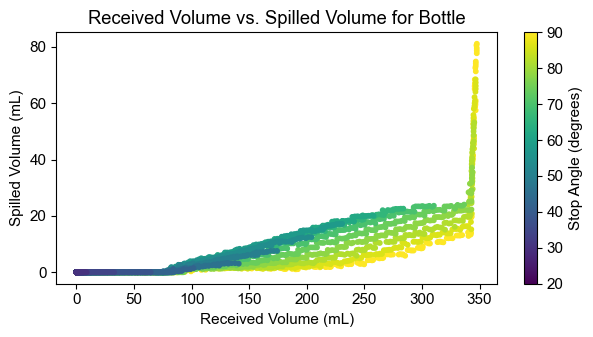

In [36]:
# load the data from summary_flask.csv and skip rows 0 and 1 using pandas library
summary_flask = pd.read_csv('summary_medium_final.csv', skiprows=[0,1])

#plt.figure(figsize=(6.3, 5))
# make colors of point based on the 7th column with small marker size
spilled_volume = summary_flask.iloc[:,8]

spilled_volume = (spilled_volume - 8)*0.7 

for i in range(len(spilled_volume)):
    if spilled_volume[i] < 0:
        spilled_volume[i] = 0

input_volume = summary_flask.iloc[:,7]

plt.figure(figsize=(6.3, 3.5))

# plot the spilled volume against the input volume
plt.scatter(input_volume, spilled_volume, c=summary_flask.iloc[:,3], s=10)

# axis labels
plt.ylabel('Spilled Volume (mL)')
plt.xlabel('Received Volume (mL)')
plt.title('Received Volume vs. Spilled Volume for Bottle')
# explain colorbar
plt.colorbar(label='Stop Angle (degrees)')
plt.tight_layout()
plt.savefig('plots/4_2_I_spilled_vs_received_volume_bottle.png', dpi=300)
plt.show()

In [18]:
# load the data from summary_flask.csv and skip rows 0 and 1 using pandas library
summary_flask = pd.read_csv('summary_medium_final.csv', skiprows=[0,1])

#plt.scatter(summary_flask.iloc[:,7], summary_flask.iloc[:,5], c=summary_flask.iloc[:,3], s=10)

received_volume = summary_flask.iloc[:,7]
start_volume = summary_flask.iloc[:,5]

start_volumes = []
received_volume_tem = []
possible_output_volumes = []

for i in range(len(received_volume)):
    if round(start_volume[i]) not in start_volumes:
        start_volumes.append(round(start_volume[i]))
        if received_volume_tem != []:
            #possible_output_volumes = np.linspace(0, round(max(received_volume_tem)),)
            possible_output_volumes = np.arange(0, round(max(received_volume_tem)), 1)
            #print(possible_output_volumes)
            received_volume_tem = np.array(received_volume_tem)
            # sort the received volume
            received_volume_tem = np.sort(received_volume_tem)
            #print(received_volume_tem)
            # calculate coverage of possible output volumes
            coverage = []
            for j in range(len(received_volume_tem)):
                if round(received_volume_tem[j]) in possible_output_volumes and round(received_volume_tem[j]) not in coverage:
                    coverage.append(round(received_volume_tem[j]))
            #print(coverage)
            #print(possible_output_volumes)
            #max_distance_coverage = np.mean(np.diff(coverage))
            #print(max_distance_coverage)
            #print("Coverage in percent:", round(len(coverage)/len(possible_output_volumes)*100, 2), "%")
            # get the max distance between two consecutive points
            max_distance = np.max(np.diff(received_volume_tem))
            # get the mean distance between two consecutive points
            mean_distance = np.mean(np.diff(received_volume_tem))
            print("Start volume", round(start_volume[i-1]), ", Max distance:", round(max_distance, 2), "mL, Mean distance:" , round(mean_distance, 2), "mL, Coverage:", round(len(coverage)/len(possible_output_volumes)*100, 2), "%")
            received_volume_tem = []
    
    received_volume_tem.append(received_volume[i])


Start volume 50 , Max distance: 4.04 mL, Mean distance: 0.27 mL, Coverage: 50.0 %
Start volume 50 , Max distance: 4.2 mL, Mean distance: 0.37 mL, Coverage: 53.85 %
Start volume 60 , Max distance: 3.23 mL, Mean distance: 0.2 mL, Coverage: 80.56 %
Start volume 70 , Max distance: 3.68 mL, Mean distance: 0.25 mL, Coverage: 73.33 %
Start volume 80 , Max distance: 3.73 mL, Mean distance: 0.3 mL, Coverage: 68.52 %
Start volume 90 , Max distance: 4.12 mL, Mean distance: 0.34 mL, Coverage: 60.66 %
Start volume 100 , Max distance: 4.34 mL, Mean distance: 0.38 mL, Coverage: 59.42 %
Start volume 110 , Max distance: 4.7 mL, Mean distance: 0.43 mL, Coverage: 61.84 %
Start volume 120 , Max distance: 4.63 mL, Mean distance: 0.47 mL, Coverage: 58.82 %
Start volume 130 , Max distance: 4.56 mL, Mean distance: 0.53 mL, Coverage: 55.32 %
Start volume 140 , Max distance: 7.57 mL, Mean distance: 0.8 mL, Coverage: 37.62 %
Start volume 150 , Max distance: 14.28 mL, Mean distance: 1.42 mL, Coverage: 29.46 %
Sta

Percentage done: 0.0 %
Percentage done: 0.02 %
Percentage done: 0.04 %
Percentage done: 0.06 %
Percentage done: 0.08 %
Percentage done: 0.1 %
Percentage done: 0.12 %
Percentage done: 0.14 %
Percentage done: 0.16 %
Percentage done: 0.18 %
Percentage done: 0.2 %
Percentage done: 0.22 %
Percentage done: 0.24 %
Percentage done: 0.26 %
Percentage done: 0.28 %
Percentage done: 0.3 %
Percentage done: 0.32 %
Percentage done: 0.34 %
Percentage done: 0.36 %
Percentage done: 0.38 %
Percentage done: 0.4 %
Percentage done: 0.42 %
Percentage done: 0.44 %
Percentage done: 0.46 %
Percentage done: 0.48 %
Percentage done: 0.5 %
Percentage done: 0.52 %
Percentage done: 0.54 %
Percentage done: 0.56 %
Percentage done: 0.58 %
Percentage done: 0.6 %
Percentage done: 0.62 %
Percentage done: 0.64 %
Percentage done: 0.66 %
Percentage done: 0.68 %
Percentage done: 0.7 %
Percentage done: 0.72 %
Percentage done: 0.74 %
Percentage done: 0.76 %
Percentage done: 0.78 %
Percentage done: 0.8 %
Percentage done: 0.82 %
P

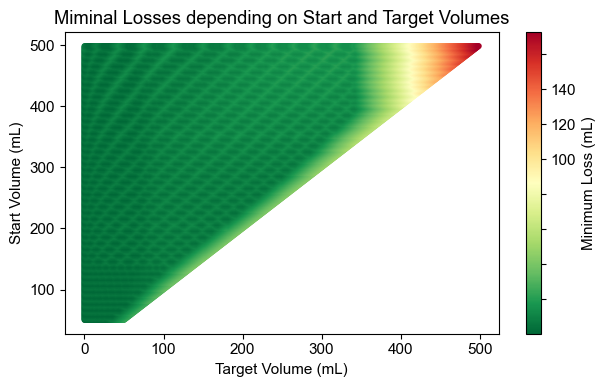

In [23]:
import numpy as np

possible_start_volumes = np.arange(50, 500)  # Array of start volumes from 50 to 150 ml
output_volumes = []
start_volumes = []
min_losses = []

# load the data from summary_flask.csv and skip rows 0 and 1 using pandas library
summary_flask = pd.read_csv('summary_medium_final.csv', skiprows=[0,1])


for start_volume in possible_start_volumes:
    for i in range(start_volume + 1):
        start_volumes.append(start_volume)  # Array of output volumes from 0 to start_volume ml in steps of 1 ml
        output_volumes.append(i)

        start = start_volume
        target = i

        min_loss = 100000

        # iterate thorugh all rows of summary_flask
        for j in range(len(summary_flask)):
            loss = abs(summary_flask.iloc[j,5] - start) + abs(summary_flask.iloc[j,7] - target) + summary_flask.iloc[j,8]*0.3
            if loss < min_loss:
                min_loss = loss
        
        min_losses.append(min_loss)

    print("Percentage done:", round((start_volume-50)/(500/10), 2), "%")

    #start_volumes.append(start_volume)  # Array of start volumes from 1 to 150 ml
    #output_volumes.append(np.arange(0, start_volume + 1))  # Array of output volumes from 0 to start_volume ml in steps of 1 ml

    #print(start_volumes)
    #print(output_volumes)

#array = np.column_stack((start_volumes, output_volumes))  # Combine start_volumes and output_volumes into a single array
#print(output_volumes)
#print(array)

# make scatter plot with start volumes on y-axis and output volumes on x-axis and color based on min_losses, low min_losses are green, high min_losses are red
plt.figure(figsize=(6.3, 4))
plt.scatter(output_volumes, start_volumes, c=min_losses, cmap='RdYlGn_r', s=10)

# axis labels
plt.ylabel('Start Volume (mL)')
plt.xlabel('Target Volume (mL)')
plt.title('Miminal Losses depending on Start and Target Volumes')
# explain colorbar
#plt.colorbar(label='Minimum Loss (mL)')
plt.colorbar(label='Minimum Loss (mL)', format=matplotlib.ticker.LogFormatter())

plt.tight_layout()
#plt.savefig('Plots/4_2_J_minimal_losses_bottle.png', dpi=600)
plt.show()

In [24]:
output_volumes_plot = output_volumes
start_volumes_plot = start_volumes
min_losses_plot = min_losses

In [30]:
len(output_volumes_plot)

123975

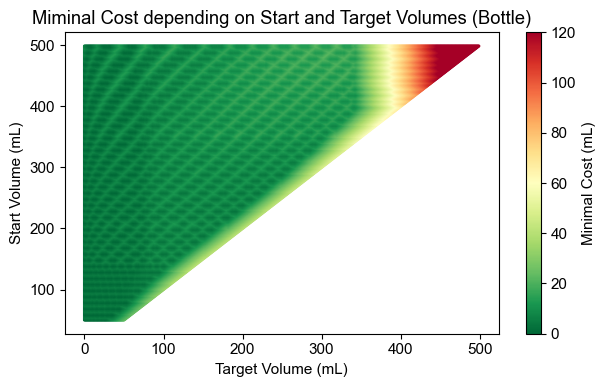

In [34]:
plt.figure(figsize=(6.3, 4))
plt.scatter(output_volumes_plot, start_volumes_plot, c=(min_losses_plot), cmap='RdYlGn_r', s=1.5, vmin=0, vmax=120, marker='o')

# axis labels
plt.ylabel('Start Volume (mL)')
plt.xlabel('Target Volume (mL)')
plt.title('Miminal Cost depending on Start and Target Volumes (Bottle)')
# explain colorbar
plt.colorbar(label='Minimal Cost (mL)')
plt.tight_layout()
plt.savefig('plots/4_2_J_minimal_cost_bottle.png', dpi=600)
plt.show()